# Twitter Sentiment Analysis using Machine Learning

## Data Preprocessing

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Corona_Tweets.csv')

In [4]:
dataset.shape

(2090, 7)

<IPython.core.display.Javascript object>


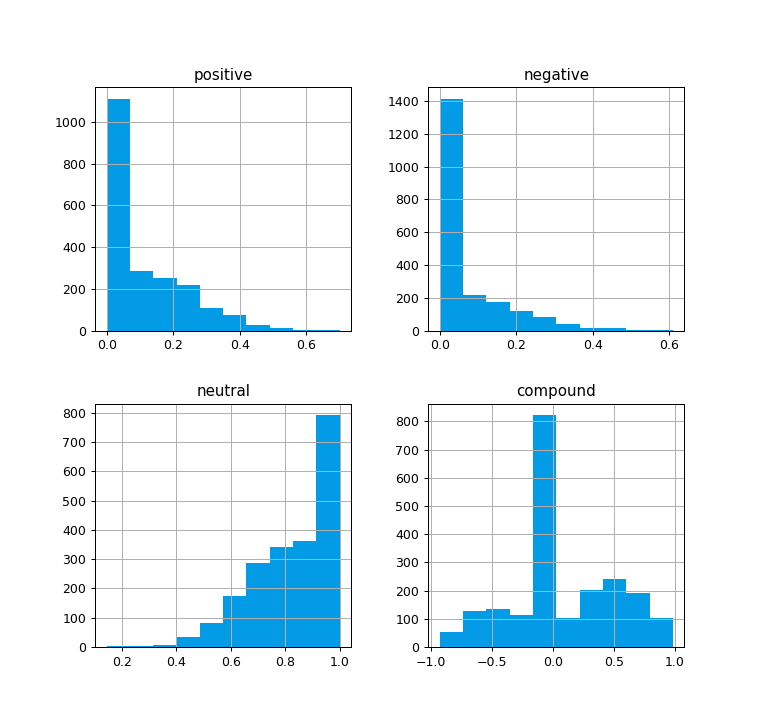

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
dataset.hist(bins=10, ax=ax, color="#039be5")
plt.show()

<IPython.core.display.Javascript object>


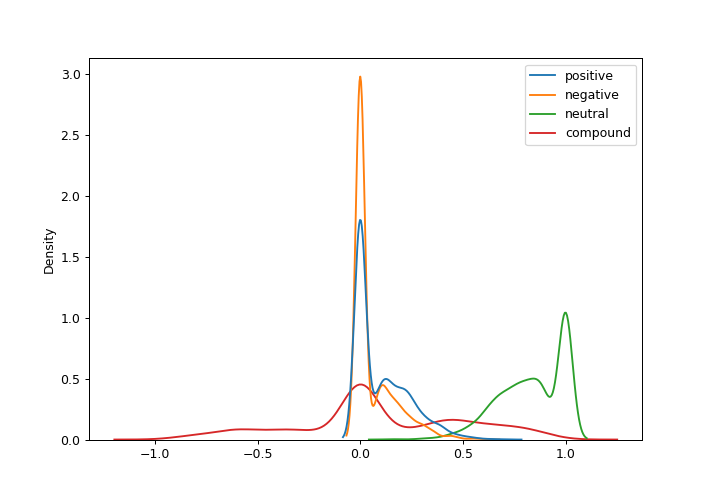

<AxesSubplot:ylabel='Density'>

In [6]:
fig = plt.figure()
sns.kdeplot(data = dataset)

<IPython.core.display.Javascript object>


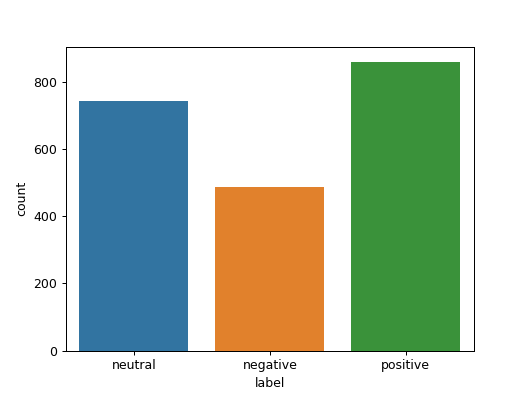

<AxesSubplot:xlabel='label', ylabel='count'>

In [7]:
fig = plt.figure()
sns.countplot(x = 'label', data = dataset)

<IPython.core.display.Javascript object>


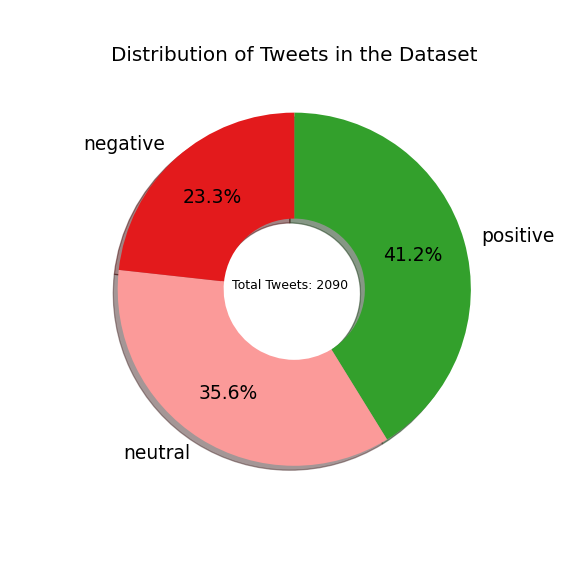

Text(0.5, 1.0, 'Distribution of Tweets in the Dataset')

In [8]:
plt.figure(figsize = (7,7))
sorted_counts = dataset['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[3:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(dataset.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16)

In [9]:
dataset['label'][dataset['label'] == 'positive'].count(), dataset['label'][dataset['label'] == 'neutral'].count(), dataset['label'][dataset['label'] == 'negative'].count()

(861, 743, 486)

In [10]:
dataset = dataset[['full_text', 'label']]

In [11]:
dataset

,full_text,label
0,covid19 lungdiseas public health england,neutral
1,journalistdeath far institut percept studi cov...,neutral
2,noida polic arrest lodg fir challan peopl flou...,negative
3,india start bounc back second wave covid19 let...,negative
4,chines student infect covid19 take gaokao isol...,neutral
...,...,...
2085,scienc year limit seat avail first session sta...,neutral
2086,good morn let great taco tuesday tuesdaymorn t...,positive
2087,two covid care centr bed total capac bed set m...,positive
2088,inspir saint ji insan volunt provid corona pre...,positive


In [12]:
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, -1].values

In [13]:
print(X)

['covid19 lungdiseas public health england'
 'journalistdeath far institut percept studi covid19 savejournalist'
 'noida polic arrest lodg fir challan peopl flout covid19 regul day one unlock'
 ...
 'two covid care centr bed total capac bed set made function region colleg physic educ panisagar north tripura stayhom staysaf'
 'inspir saint ji insan volunt provid corona prevent kit fruit juic coronawarrior differ villag citi state covidwelfarebyvolunt salutetocoronawarrior dsscovidhelp'
 'receiv what app close friend way forward seem medic profess life threaten vocat hazard doctorassault doctorslivematt coronaviruspandem corona corona2ndwav coronawarrior coronavirusupd']


In [14]:
print(y)

['neutral' 'neutral' 'negative' ... 'positive' 'positive' 'positive']


In [15]:
pd.unique(y)

array(['neutral', 'negative', 'positive'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # this will encode in the following manner -> negative: 0, neutral: 1, positive: 2
y = le.fit_transform(y)
print(y)

[1 1 0 ... 2 2 2]


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(max_features = 7000)
X = count_vector.fit_transform(X).toarray()

In [18]:
results = {}
final_results = []

## Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Making the Confusion Matrix & Evaluating Scores

In [20]:
from time import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
def plot_confusion_accuracy():
    results['Training Time'] = end - start
    
    start1 = time()
    y_pred = classifier.predict(X_test)
    end1 = time()
    results['Prediction Time'] = end1 - start1
    
    cm = confusion_matrix(y_test, y_pred)
    
    ConfusionMatrixDisplay(cm, display_labels = classifier.classes_).plot()
    
    results['ML Model'] = classifier.__class__.__name__
    results['Accuracy Score'] = accuracy_score(y_test, y_pred)
    results['Precision Score'] = precision_score(y_test, y_pred, average = 'weighted')
    results['Recall Score'] = recall_score(y_test, y_pred, average = 'weighted')
    results['F1 Score'] = f1_score(y_test, y_pred, average = 'weighted')

    #final_results.append(results.copy())

## Training the Logistic Regression model on the Training set

<IPython.core.display.Javascript object>


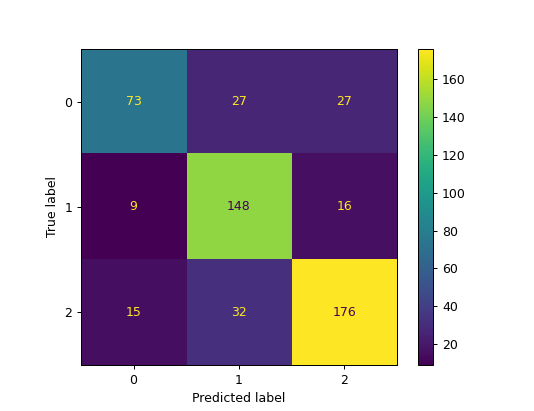

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
start = time()
classifier.fit(X_train, y_train)
end = time()

plot_confusion_accuracy()

## Applying k-Fold Cross Validation on Logistic Regression

In [22]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy').mean()
results['Cross Validation Score'] = accuracies

final_results.append(results.copy())

## Training the SVM model on the Training set

<IPython.core.display.Javascript object>


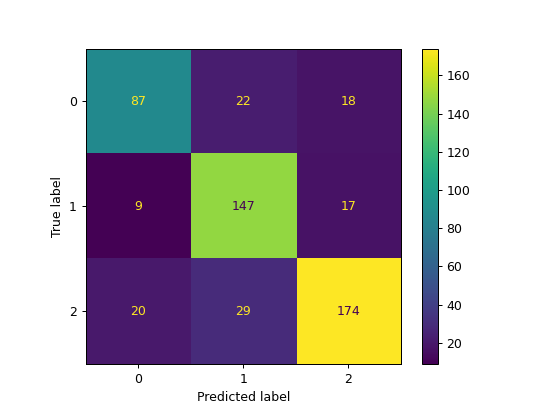

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
start = time()
classifier.fit(X_train, y_train)
end = time()

plot_confusion_accuracy()

## Applying k-Fold Cross Validation on SVM

In [24]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy').mean()
results['Cross Validation Score'] = accuracies
## Training the Decision Tree Classification model on the Training set
final_results.append(results.copy())

## Training the Decision Tree Classification model on the Training set

<IPython.core.display.Javascript object>


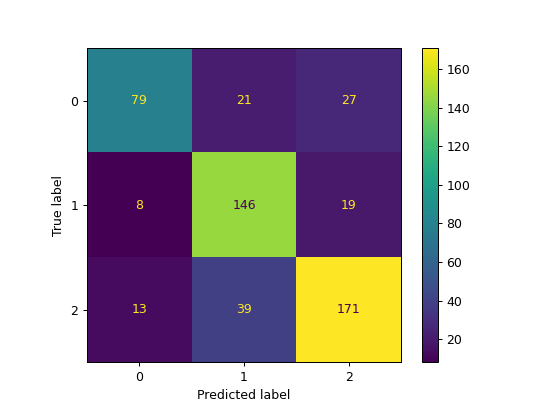

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
start = time()
classifier.fit(X_train, y_train)
end = time()

plot_confusion_accuracy()

## Applying k-Fold Cross Validation on Decision Tree Classification

In [26]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy').mean()
results['Cross Validation Score'] = accuracies

final_results.append(results.copy())## Training the Random Forest Classification model on the Training set

## Training the Random Forest Classification model on the Training set

<IPython.core.display.Javascript object>


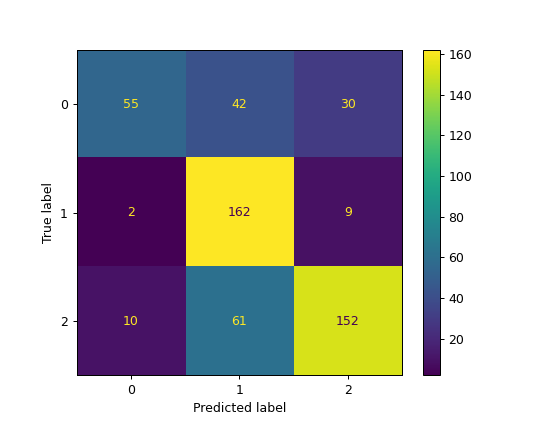

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
start = time()
classifier.fit(X_train, y_train)
end = time()

plot_confusion_accuracy()

## Applying k-Fold Cross Validation on Random Forest Classification

In [28]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy').mean()
results['Cross Validation Score'] = accuracies
## Training the Stochastic Gradient Classification model on the Training set
final_results.append(results.copy())

## Training the Stochastic Gradient Classification model on the Training set

<IPython.core.display.Javascript object>


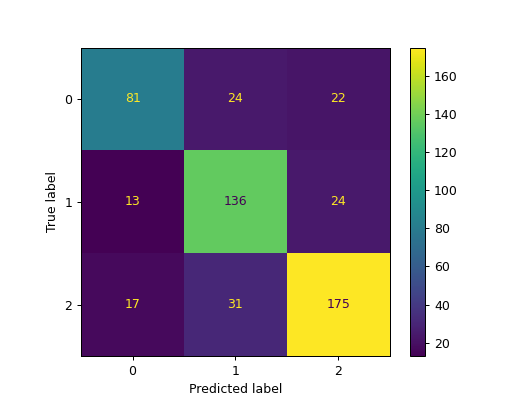

In [29]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(random_state = 0)
start = time()
classifier.fit(X_train, y_train)
end = time()

plot_confusion_accuracy()

## Applying k-Fold Cross Validation on Stochastic Gradient Classification

In [30]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy').mean()
results['Cross Validation Score'] = accuracies

final_results.append(results.copy())